In [1]:
#!pip install scikit_dsp_comm
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sk_dsp_comm import digitalcom as dc
from scipy.fftpack import fft, fftfreq

In [31]:
def trans_fourier_f (x,sample_rate,window=None,l=0):
    if l > len(x):
        x = np.pad(x,(0,l))
    if window:
        window = np.hamming(len(x))
        XX = window*x ##usamos ventanas para mejorar la FFT       
    XX = np.fft.fft(x)
    XX = np.fft.fftshift(XX)
    X = abs(XX)
    angle = np.angle(XX)
    Df = sample_rate/len(x)
    f = np.linspace((-len(x)/2)*Df,(len(x)/2)*Df,len(x),endpoint=None)
    return (f,X,angle)
  
def plot_frec (f,x,angle,dB=0):
    plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k') 
    plt.subplot(2,1,1)
    if dB == 1:
        axes = plt.gca()
        axes.set_xlim([-1000,1000])
        axes.set_ylim([-40,60])
        plt.plot(f,20*np.log10(x/len(x)))
        plt.grid()
    else:
        plt.plot(f,x/len(x))
        #plt.stem(f,X/len(X),use_line_collection=True)        
        plt.grid()
        plt.xlabel("frecuencia en Hertz")
    if dB == 1:
        plt.ylabel("Amplitud en dB")
    else:
        plt.ylabel("Amplitud en veces")
    plt.title("Señal X(f)")
    plt.subplot(2,1,2)
    plt.plot(f,angle)
    plt.grid()
    plt.xlabel("frecuencia en Hertz")
    plt.ylabel("Angulo de X(f)")

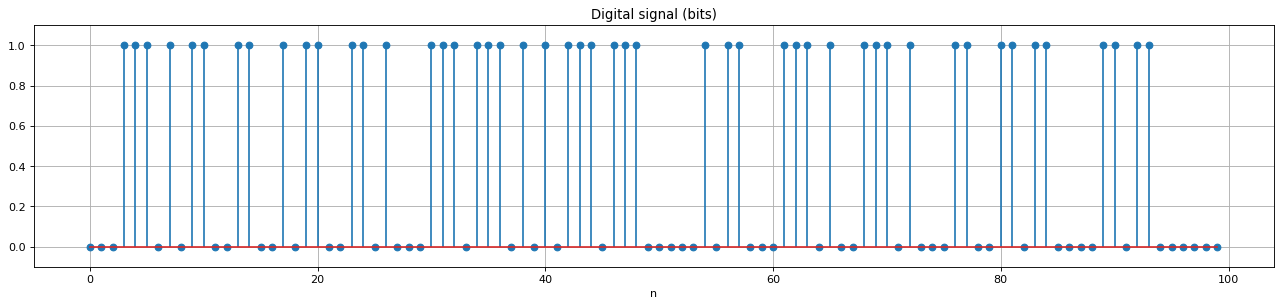

In [3]:
fs = 1000000   # [Hz] Frecuencia de muestreo
Ts = 1/fs
N_bits = 100 # Número total de bits
Tbit = 0.01 # Tiempo de bit 
sps = int(fs*Tbit) # Samples per symbol
t = np.arange(0,N_bits*sps,1)

bits = np.random.randint(2, size=N_bits) # Our data to be transmitted, 1s and 0s
plt.figure(figsize=(20,4), dpi= 80, facecolor='w', edgecolor='k')
plt.stem(bits,use_line_collection='True')
plt.title('Digital signal (bits)')
plt.ylim([-0.1, 1.1])
plt.xlabel('n')
plt.grid()

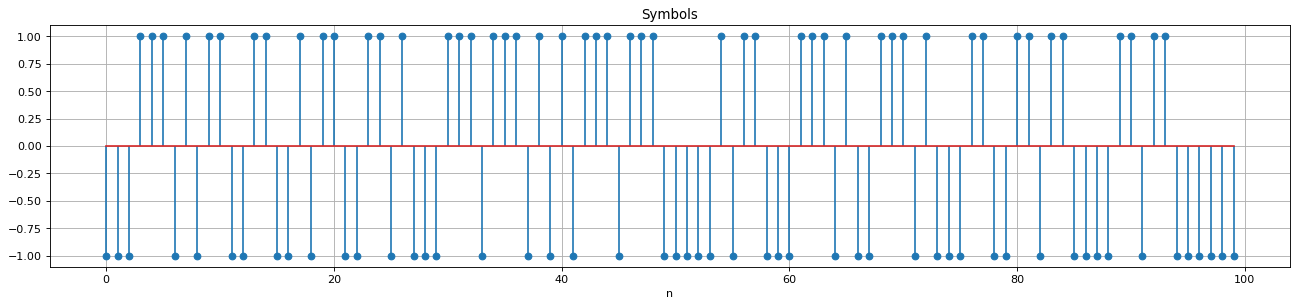

In [4]:
symbols = 2*bits-1 #para convertir 0 y 1 en -1 y +1

plt.figure(figsize=(20,4), dpi= 80, facecolor='w', edgecolor='k')
plt.stem(symbols)
plt.title('Symbols')
plt.ylim([-1.1, 1.1])
plt.xlabel('n')
plt.grid()

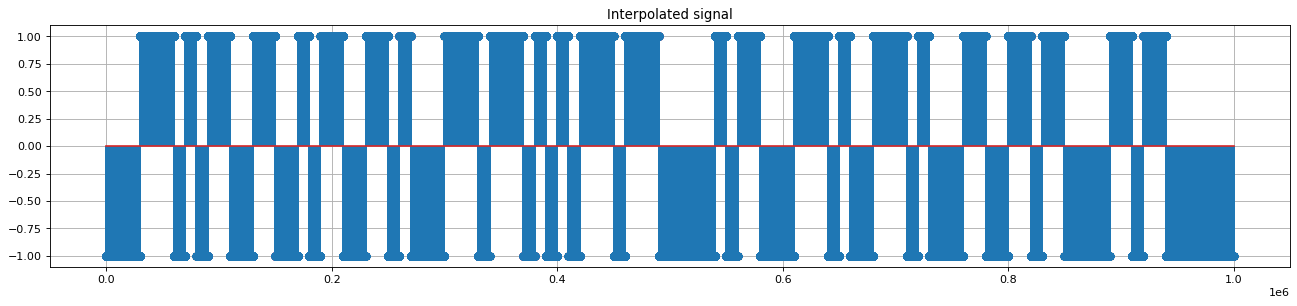

In [5]:
sym_interp = np.array([])
for symbol in symbols:
    pulse = np.ones(sps)*symbol
    sym_interp = np.concatenate((sym_interp, pulse))
    
plt.figure(figsize=(20,4), dpi= 80, facecolor='w', edgecolor='k')
plt.stem(sym_interp)
plt.title('Interpolated signal')
plt.grid()

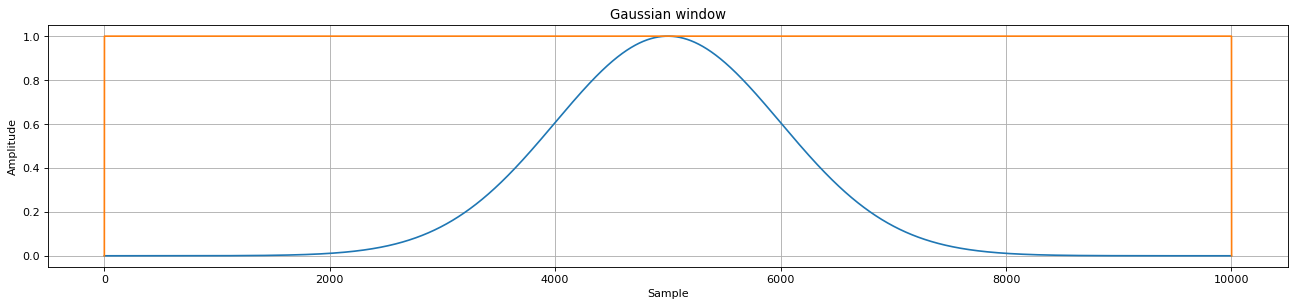

In [116]:
L = 10000
std = 1000
gaussFilter = signal.gaussian(L,std)

pulso = np.append(np.append(0,np.ones(sps)),0)

plt.figure(figsize=(20,4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(gaussFilter)
plt.plot(pulso)
plt.title("Gaussian window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.grid()

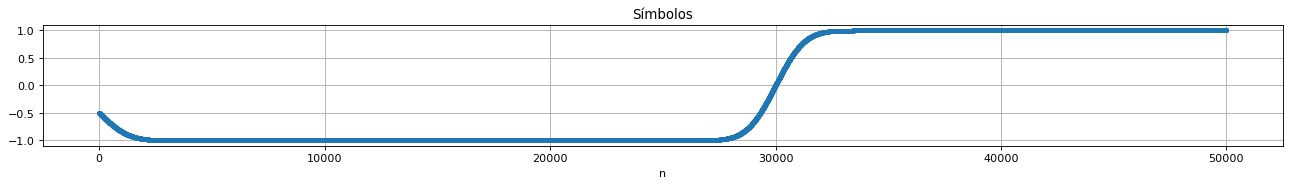

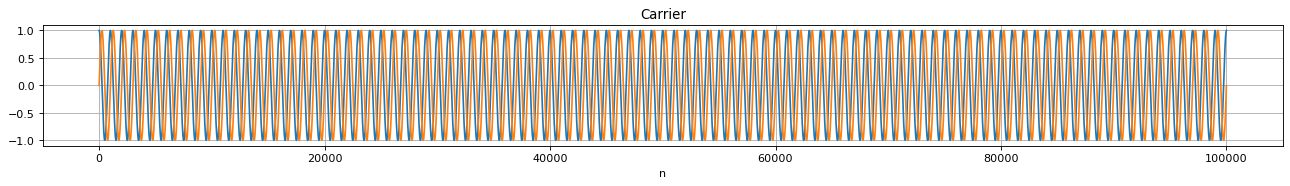

1004999
1004999


In [102]:
tauG = int(L/2)

sym_filt = np.convolve(sym_interp,gaussFilter)
sym_filt = sym_filt[tauG:]/np.max(sym_filt)

plt.figure(figsize=(20,2), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(sym_filt[0:50000],'.')
plt.xlabel('n')
#plt.ylabel('Amplitude')
plt.title('Símbolos')
plt.grid()

f_c = 1000  # [Hz] frecuencia del oscilador local (carrier)
t = np.arange(len(sym_filt))

OL_i = np.cos(2*np.pi*f_c*(t*Ts))
OL_q = np.sin(2*np.pi*f_c*(t*Ts))

plt.figure(figsize=(20, 2), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(OL_i[0:100000])
plt.plot(OL_q[0:100000])
plt.title('Carrier')
plt.ylim([-1.1, 1.1])
plt.xlabel('n')
plt.grid()
plt.show()

print(len(sym_filt))
print(len(OL_i))

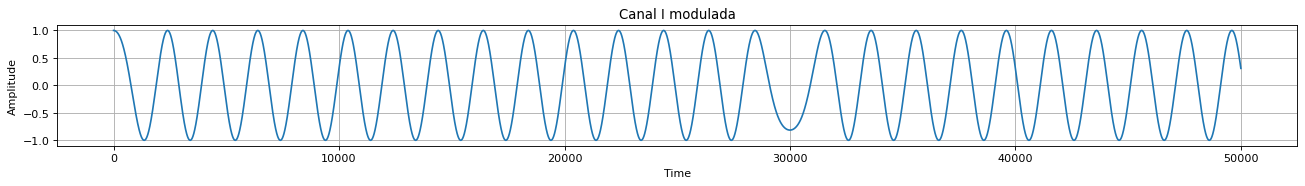

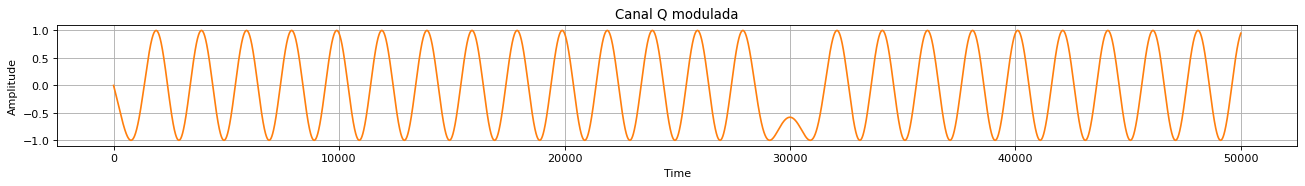

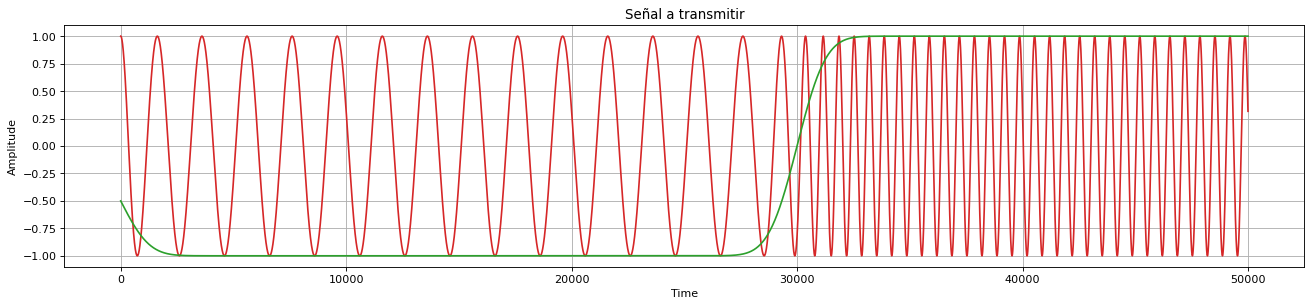

In [103]:
DeltaF = 500

#theta = sym_filt*2*np.pi*(DeltaF)*(t*Ts)

theta = []
theta_acumulada = 0
for i_señal_tx in sym_filt:
    theta_acumulada += i_señal_tx*(Ts)*(2*np.pi)*DeltaF
    theta.append(theta_acumulada)

# plt.figure(figsize=(20,4), dpi= 80, facecolor='w', edgecolor='k')
# plt.plot(theta)
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.title('')
# plt.grid()

I = np.cos(theta)
plt.figure(figsize=(20,2), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(I[0:50000])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Canal I modulada')
plt.grid()

Q = np.sin(theta)
plt.figure(figsize=(20,2), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(Q[0:50000],'C1')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Canal Q modulada')
plt.grid()

# Señal modulada
s = OL_i*I - OL_q*Q

plt.figure(figsize=(20,4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(s[0:50000],'C3')
plt.plot(sym_filt[0:50000],'C2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Señal a transmitir')
plt.grid()

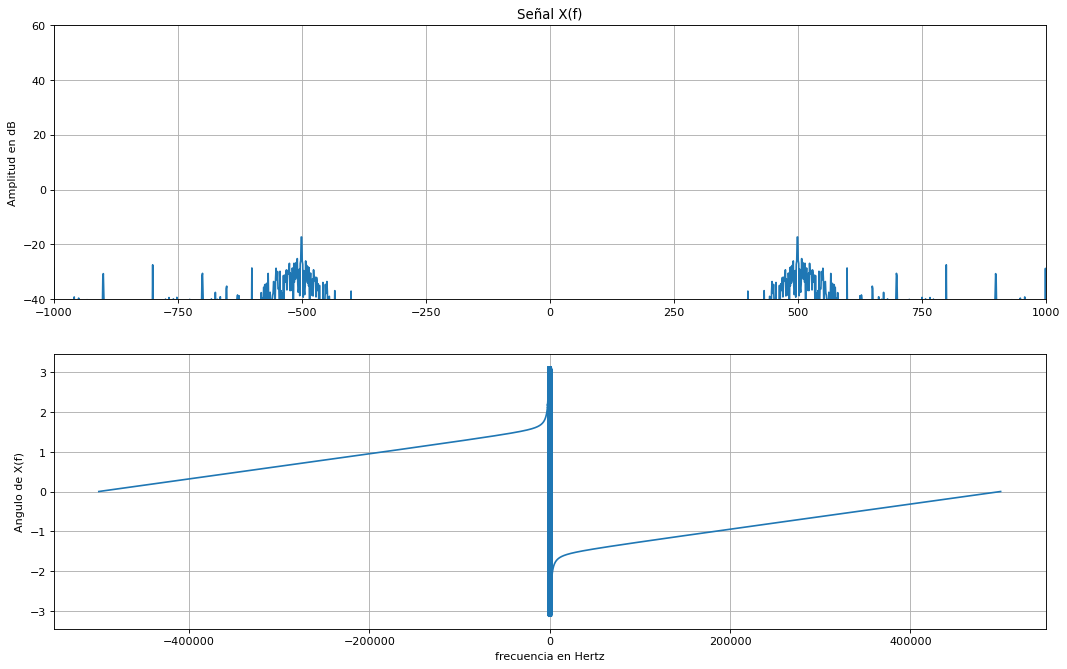

In [104]:
# Respuesta en frecuencia 
f,X,angle = trans_fourier_f(s,fs,window=True,l=0)
plot_frec(f,X,angle,dB=1)

# Ahora con la Pluto

### Configuración

In [ ]:
# Libero la Pluto
del(sdr)

In [105]:
import adi
st = (I + 1j*Q)*2**14

sdr = adi.Pluto()

sdr.rx_destroy_buffer()
sdr.rx_lo = 1000000000 # [Hz]
sdr.rx_rf_bandwidth = 10000
sdr.rx_cyclic_buffer = True
sdr.rx_buffer_size = len(st)
print('Frame size:',sdr.rx_buffer_size)
if sdr.rx_buffer_size<3660:
    print('Using less than 3660 samples per frame can yield poor performance')

sdr.tx_destroy_buffer()
sdr.tx_lo = 1000000000 # [Hz]
sdr.tx_cyclic_buffer = True
sdr.tx_hardwaregain_chan0 = -10

sdr.gain_control_mode_cahn0 = "slow_attack"
sdr.sample_rate = fs # [Hz]

fs_pluto = int(sdr.sample_rate)
print('fs =',fs_pluto)

Frame size: 1004999
fs = 999999


Text(0.5, 0, 'Segundos')

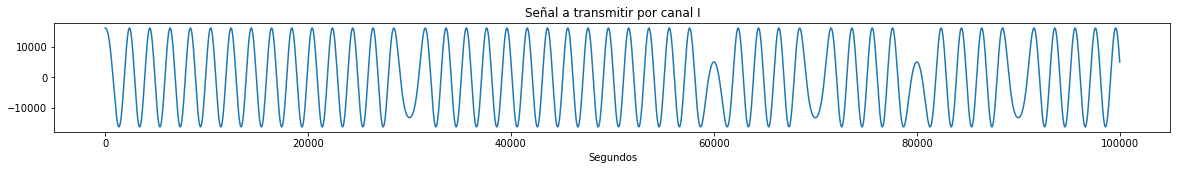

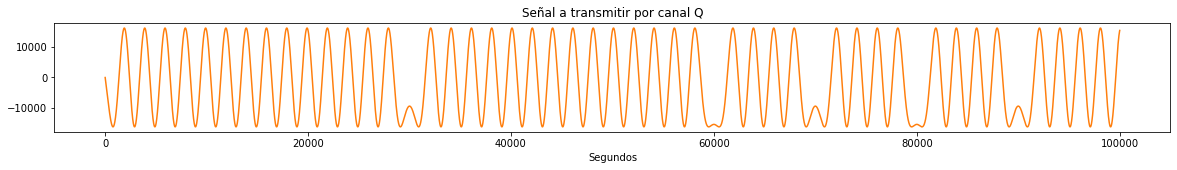

In [117]:
plt.figure(figsize=(20,2))
plt.plot(np.real(st[0:100000]))
plt.title("Señal a transmitir por canal I")
plt.xlabel("Segundos")

plt.figure(figsize=(20,2))
plt.plot(np.imag(st[0:100000]),'C1')
plt.title("Señal a transmitir por canal Q")
plt.xlabel("Segundos")

### Transmisión

In [107]:
sdr.tx(st)

### Recepción

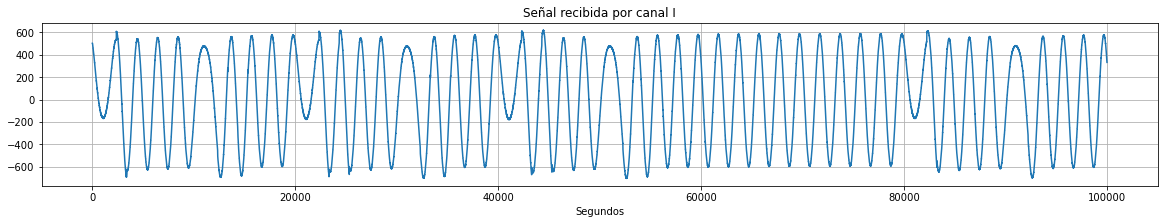

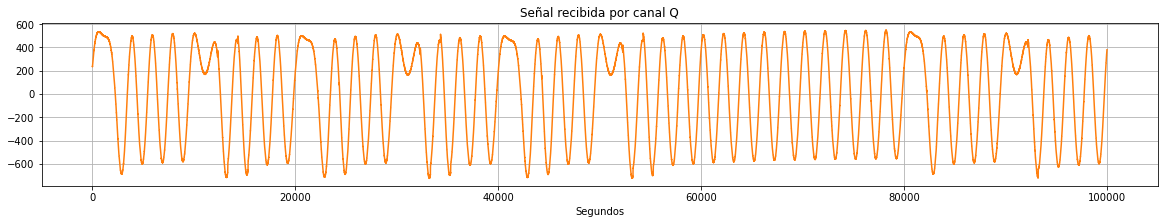

In [118]:
rt = sdr.rx()

plt.figure(figsize=(20,3))
plt.plot(np.real(rt[0:100000]))
plt.title("Señal recibida por canal I")
plt.xlabel("Segundos")
plt.grid()

plt.figure(figsize=(20,3))
plt.plot(np.imag(rt[0:100000]),'C1')
plt.title("Señal recibida por canal Q")
plt.xlabel("Segundos")
plt.grid()

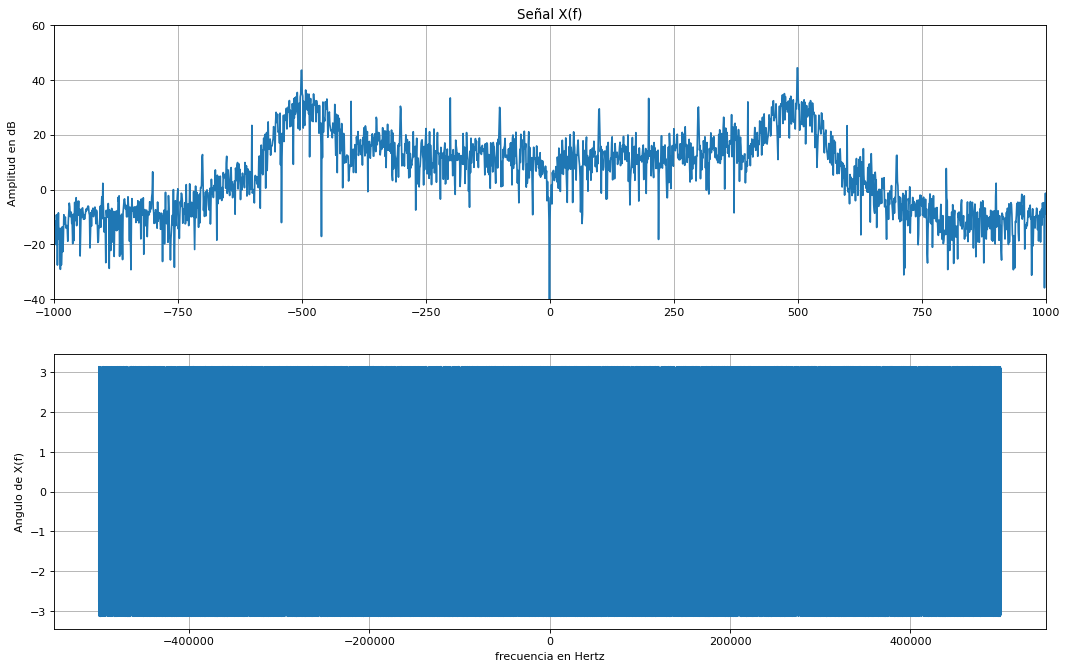

In [119]:
# Respuesta en frecuencia 
f,X,angle = trans_fourier_f(rt,fs,window=True,l=0)
plot_frec(f,X,angle,dB=1)

Text(0.5, 1.0, 'Recibido')

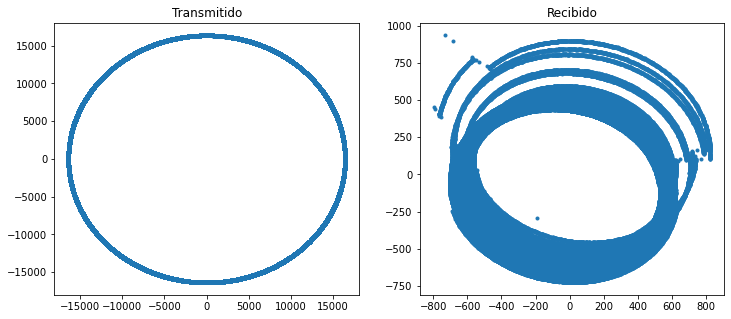

In [125]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(np.real(st),np.imag(st),'.')
plt.title('Transmitido')

plt.subplot(1,2,2)
plt.plot(np.real(rt),np.imag(rt),'.')
plt.title('Recibido')